In [892]:
import numpy as np
import pandas as pd
#import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['font.size'] = 15.0
#plt.rcParams.update({'font.size': 28})
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import brown
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [835]:
hack = pd.read_csv('hackmageddon.csv',encoding = "ISO-8859-1")

In [836]:
hack.shape

(1966, 9)

In [837]:
hack

,Attack,Attack_class,Author,Country,Description,Target,Target_class,Year,dat
0,Unknown,CC,?,CA,A server hack at Algonquin College in Ottawa l...,Algonquin College,Education,2015,12/06/15
1,Unknown,CC,?,IN,The salary accounts of more than 23 employees ...,Infosys Ltd,Industry: Software,2015,17/06/15
2,Malware,CC,?,JP,The internal computer network of the state-run...,Japan Environmental Storage & Safety Corp.,Industry: waste treatment,2015,15/06/15
3,Targeted Attack,CE,?,>1,Researchers from Palo Alto Networks reveal the...,>1,"GovernmentÛ¬,\rMilitary",2015,16/06/15
4,Unknown,CC,St. Louis Cardinals,US,The St. Louis Cardinals baseball franchise is ...,Houston Astros,Single Individual,2015,16/06/15
5,Account Hijacking,CC,?,SE,Attackers believed to have originated in China...,Bonnier Publications,Industry: Media,2015,16/06/15
6,Account Hijacking,CC,?,CA,"Efnet, a major IRC network, is compromised, pu...",EFnet,Forum,2015,16/06/15
7,Defacement,H,PhÌ©nomÌ©ne Dz,US,Federal officials investigate after a Universi...,University of Baltimore affiliated website (bn...,Education,2015,16/06/15
8,DDoS,H,Anonymous,CA,More than a dozen Canadian government departme...,Canadian Governments Web Sites,Government,2015,17/06/15
9,Malicious Content Injection,CC,?,US,"digitalconstitution.com, the Microsoft's websi...",digitalcostitution.com,Industry: Software,2015,17/06/15


In [838]:
hack['Author']= hack['Author'].str.replace('?','Unknown')

In [839]:
hack.columns = hack.columns.str.replace('dat','Date')

In [840]:
hack['Attack_class'] = hack['Attack_class'].replace(['H','CC','CE','CW'],['Hacktivism', 'Cyber Crime','Cyber Espionage','Cyber War'])

In [867]:
hack['Attack']=[i.replace('?','') for i in hack['Attack']]
hack['Attack']=[i.replace(',\r','') for i in hack['Attack']]

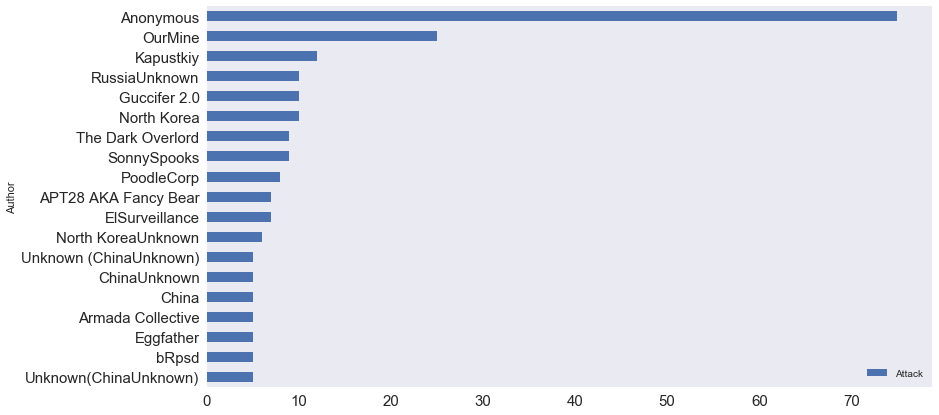

In [871]:
hack.groupby('Author').agg({'Attack':'count'}).sort_values('Attack', ascending = True).tail(20)[:-1].plot.barh(grid = False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("hacker.png",bbox_inches='tight')

In [866]:
hack['Attack']

0                                             Unknown
1                                             Unknown
2                                             Malware
3                                     Targeted Attack
4                                             Unknown
5                                   Account Hijacking
6                                   Account Hijacking
7                                          Defacement
8                                                DDoS
9                         Malicious Content Injection
10                                    Targeted Attack
11                                            Malware
12                                            Unknown
13                                               SQLi
14                                            Unknown
15                                    Targeted Attack
16                                               SQLi
17                                        Brute Force
18                          

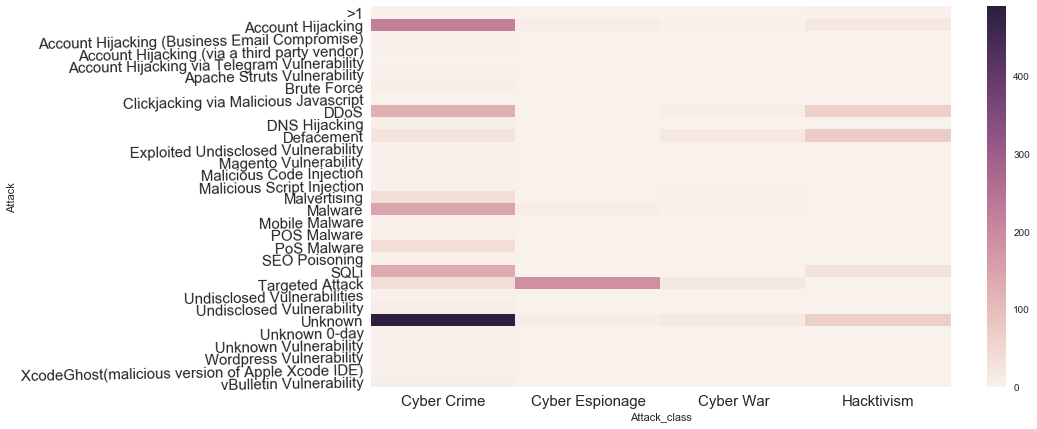

In [869]:
g = hack.groupby(['Attack_class','Attack']).agg({'Target':'count'}).reset_index().sort_values('Target',ascending = False).head(50)
#sns.heatmap(g)
#
test = g.pivot("Attack","Attack_class","Target").fillna(0)

sns.heatmap(test)
plt.yticks(rotation=1)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("heatmap.png",bbox_inches='tight')


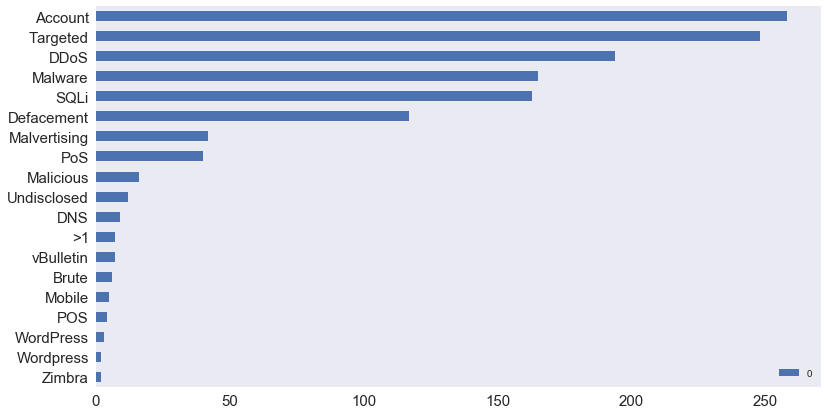

In [864]:
b = [i.split(' ')[0] for i in hack['Attack'].tolist() if type(i) != float]
b = [i.split(',')[0] for i in b if type(i) != float]
b = [i.split(',\r')[0] for i in b if type(i) != float]
b = [str(i).replace('?','') for i in b]

#b.groupby('Attack').agg({'Author':'count'}).reset_index().sort_values('Author', ascending = False)
pd.DataFrame.from_dict(dict(Counter(b)),orient='index').sort_values(0,ascending=True).tail(20)[:-1].plot.barh(grid=False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("top_attack_bar.png",bbox_inches='tight')

In [845]:
hack.groupby(['Author','Attack']).agg({'Target':'count'}).sort_values('Target',ascending = False)
#sns.heatmap(q)

Target
Author                                             Attack                                              
Unknown                                            Unknown                                          378
                                                   Account Hijacking                                172
                                                   Malware                                          138
                                                   DDoS                                              94
                                                   Targeted Attack                                   86
                                                   Malvertising                                      39
                                                   PoS Malware                                       38
                                                   SQLi                                              34
Anonymous                                          DDoS                                              33
OurMine                                            Account Hijacking                                 21
Anonymous                                          Unknown                                           18
Kapustkiy                                          SQLi                                              10
Anonymous                                          SQLi                                              10
Unknown                                            Defacement                                         9
Anonymous                                          Defacement                                         9
Guccifer 2.0                                       Unknown                                            8
RussiaUnknown                                      Targeted Attack                                    8
Unknown                                            Unknown,\r                                         7
North Korea                                        Targeted Attack                                    7
PoodleCorp                                         DDoS                                               7
SonnySpooks                                        Unknown                                            6
APT28 AKA Fancy Bear                               Targeted Attack                                    6
The Dark Overlord                                  Unknown                                            6
Unknown (ChinaUnknown)                             Targeted Attack                                    5
Unknown                                            vBulletin Vulnerability                            5
Eggfather                                          SQLi                                               5
Unknown                                            Undisclosed Vulnerability                          5
                                                   DNS Hijacking                                      5
Armada Collective                                  DDoS                                               5
North KoreaUnknown                                 Targeted Attack                                    5
Unknown                                            Brute Force                                        5
ElSurveillance                                     Unknown                                            4
bRpsd                                              Unknown                                            4
China                                              Targeted Attack                                    4
Unknown(ChinaUnknown)                              Targeted Attack                                    4
ChinaUnknown                                       Targeted Attack                                    4
root AKA @ciadotgov                                Unknown                                            4
Turla                                    

In [846]:
hack = hack.replace(['cloudbleed'],['2017'])

In [847]:
hack['Country'] = hack['Country'].replace(['Cyber'],['US'])

In [848]:
hack.groupby('Author').agg(['count'])['Attack'].sort_values('count', ascending=False)

,count
Author,
Unknown,1110
Anonymous,75
OurMine,25
Kapustkiy,12
Guccifer 2.0,10
North Korea,10
RussiaUnknown,10
SonnySpooks,9
The Dark Overlord,9


In [849]:
descr = hack['Description'].tolist()
tf = [True if (re.findall('million|billion',i) != []) else False for i in descr]

In [850]:
n = [str(i).replace('Industry: ','') for i in hack['Target_class']]
n = [str(i).replace('Org: ','') for i in n]

In [851]:
hack['Target_class'] = n
hack

,Attack,Attack_class,Author,Country,Description,Target,Target_class,Year,Date
0,Unknown,Cyber Crime,Unknown,CA,A server hack at Algonquin College in Ottawa l...,Algonquin College,Education,2015,12/06/15
1,Unknown,Cyber Crime,Unknown,IN,The salary accounts of more than 23 employees ...,Infosys Ltd,Software,2015,17/06/15
2,Malware,Cyber Crime,Unknown,JP,The internal computer network of the state-run...,Japan Environmental Storage & Safety Corp.,waste treatment,2015,15/06/15
3,Targeted Attack,Cyber Espionage,Unknown,>1,Researchers from Palo Alto Networks reveal the...,>1,"GovernmentÛ¬,\rMilitary",2015,16/06/15
4,Unknown,Cyber Crime,St. Louis Cardinals,US,The St. Louis Cardinals baseball franchise is ...,Houston Astros,Single Individual,2015,16/06/15
5,Account Hijacking,Cyber Crime,Unknown,SE,Attackers believed to have originated in China...,Bonnier Publications,Media,2015,16/06/15
6,Account Hijacking,Cyber Crime,Unknown,CA,"Efnet, a major IRC network, is compromised, pu...",EFnet,Forum,2015,16/06/15
7,Defacement,Hacktivism,PhÌ©nomÌ©ne Dz,US,Federal officials investigate after a Universi...,University of Baltimore affiliated website (bn...,Education,2015,16/06/15
8,DDoS,Hacktivism,Anonymous,CA,More than a dozen Canadian government departme...,Canadian Governments Web Sites,Government,2015,17/06/15
9,Malicious Content Injection,Cyber Crime,Unknown,US,"digitalconstitution.com, the Microsoft's websi...",digitalcostitution.com,Software,2015,17/06/15


In [852]:
hack['Attack_class']=[str(i).replace(',\r','') for i in hack['Attack_class']]

In [853]:
hack['Attack_class']=hack['Attack_class'].replace(['CC','CCCE','CW?','H','IN','Industry: Telco','JP','US'],['Cyber Crime','Cyber Espionage','Cyber War','Hacktivism','Cyber Crime','Cyber War','Hacktivism','Cyber Espionage'])

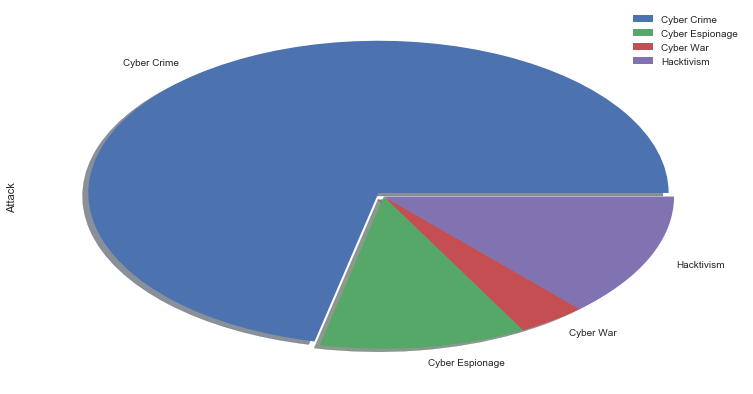

In [887]:

hack.groupby('Attack_class').agg({'Attack': 'count'}).plot.pie(subplots=True, explode=(0.03,0,0,0), shadow=True)
plt.tick_params(labelsize='25')
#plt.savefig("attack_class_pie.png",bbox_inches='tight')

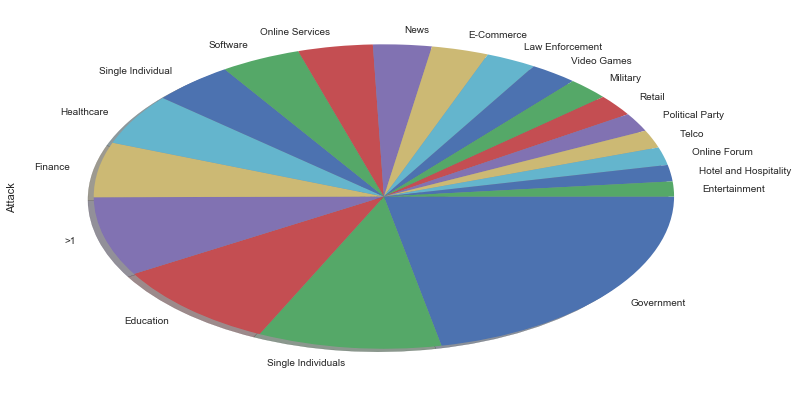

In [893]:
hack.groupby('Target_class').agg({'Attack': 'count'}).sort_values('Attack', ascending = False) \
.head(20).plot.pie(subplots=True,shadow=True, counterclock = False,legend=None)
#mpl.rcParams['font.size'] = 20.0
#plt.tick_params(axis='both', which='major', labelsize=15)
#plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("target_class.png",bbox_inches='tight')

In [858]:
#[pd.to_datetime(i,format='%d/%m/%y') for i in hack['Date']]

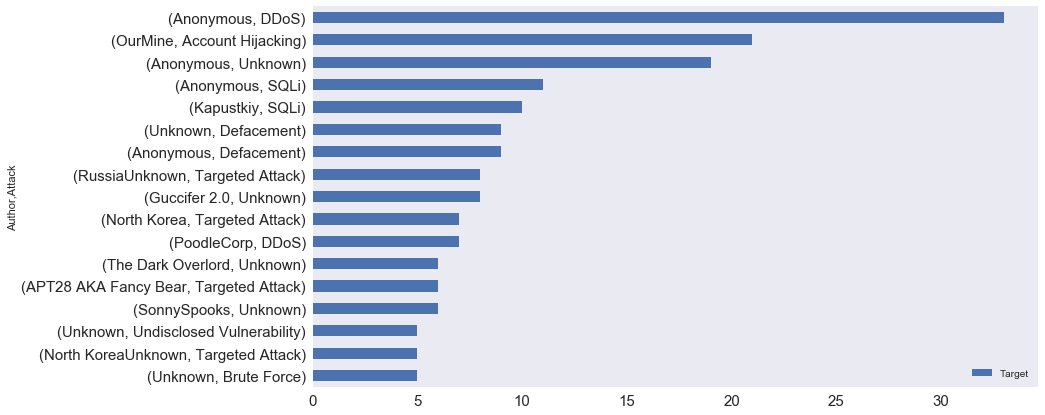

In [888]:
hack.groupby(['Author','Attack']).agg({'Target':'count'}) \
.sort_values('Target',ascending = True).tail(25)[:-8].plot.barh(grid = False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.savefig("author&attack_bar.png",bbox_inches='tight')

In [ ]:
pd.set_option('display.max_rows', 300)

In [ ]:
hack.groupby(['Author','Target_class','Country']).\
    agg({'Target':'count'}).reset_index().sort_values('Target',ascending = False)

In [ ]:
hack[hack['Author']=='Guccifer 2.0']['Description'].tolist()

In [26]:
authors = hack['Author'].tolist()

In [27]:
target = hack['Target'].tolist()

In [28]:
clas = hack['Target_class'].tolist()

In [29]:
country = hack['Country'].tolist()


In [30]:
a = [i.split(' ')[0] for i in country if type(i) != float]
a = [i.split(',')[0] for i in a if type(i) != float]
a = [i.split(',\r')[0] for i in a if type(i) != float]


In [31]:
print(Counter(a))

Counter({'US': 829, '>1': 197, 'UK': 114, 'IN': 64, 'CA': 49, 'RU': 39, 'AU': 35, 'JP': 33, 'KR': 25, 'DE': 24, 'IL': 22, 'IT': 21, 'CN': 21, 'FR': 21, 'GB': 21, 'UA': 19, 'TH': 18, 'BR': 16, 'SE': 14, 'ZA': 14, 'TR': 14, 'PK': 13, 'NL': 12, 'TW': 11, 'SA': 11, 'IE': 11, 'IR': 10, 'AZ': 9, 'HK': 9, 'CH': 8, 'PL': 7, 'VE': 7, 'PH': 7, 'INT': 7, 'BE': 6, 'MX': 6, 'NZ': 6, 'NO': 6, 'KE': 6, 'SG': 6, 'UAE': 5, 'BD': 5, 'DK': 5, 'AT': 5, 'CZ': 5, 'EU': 5, 'SY': 4, 'CY': 4, 'AM': 4, 'QA': 4, 'JO': 3, 'RO': 3, 'LK': 3, 'EC': 3, 'EG': 3, 'ES': 3, 'FI': 3, 'AE': 3, 'AF': 3, 'CC': 3, 'LU': 3, 'KY': 2, 'ID': 2, 'VN': 2, 'LB': 2, 'GR': 2, 'CR': 2, 'UG': 2, 'NG': 2, 'SK': 2, 'PA': 2, 'AL': 2, 'AR': 2, 'KW': 2, 'LT': 2, 'ME': 2, 'VU': 1, 'GE': 1, 'MY': 1, 'YU': 1, 'MA': 1, '>`1': 1, 'IQ': 1, 'IS': 1, 'BB': 1, 'OM': 1, '.TI': 1, 'KH': 1, 'CO': 1, 'RW': 1, 'H': 1, 'CL': 1, 'BO': 1, 'TZ': 1, 'GU': 1, 'AO': 1, 'DO': 1, 'FJ': 1, 'MM': 1, 'ZW': 1, 'KZ': 1, 'PY': 1, '>A': 1, 'LY': 1, 'HU': 1, 'BS': 1, 'SCO

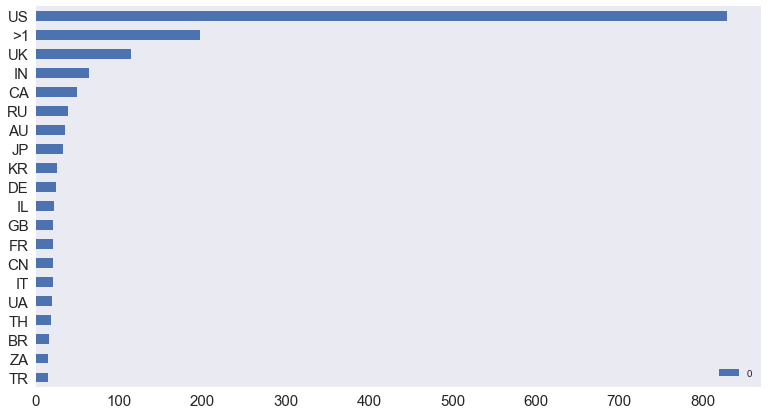

In [826]:
pd.DataFrame.from_dict(dict(Counter(a)),orient='index').sort_values(0,ascending=True).tail(20).plot.barh(grid=False)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=8)
#plt.savefig("country_bar.png",bbox_inches='tight')


In [32]:
description = hack['Description'].tolist()

In [33]:
target[:10]

['Algonquin College',
 'Infosys Ltd',
 'Japan Environmental Storage & Safety Corp.',
 '>1',
 'Houston Astros',
 'Bonnier Publications',
 'EFnet',
 'University of Baltimore affiliated website (bniajfi.org)',
 'Canadian Governments Web Sites',
 'digitalcostitution.com']

In [34]:
word = nltk.corpus.cmudict.words()

In [35]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [36]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/0xiNach/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
from nltk import word_tokenize,sent_tokenize
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in description:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [39]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 50580 items in vocab_frame


In [40]:
print (vocab_frame.head())

               words
a                  a
server        server
hack            hack
at                at
algonquin  algonquin


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(description) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 2.39 s, sys: 21.5 ms, total: 2.41 s
Wall time: 2.42 s
(1966, 45)


In [42]:
terms = tfidf_vectorizer.get_feature_names()

In [344]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity (tfidf_matrix)

In [44]:
tfidf_matrix

<1966x45 sparse matrix of type '<class 'numpy.float64'>'
	with 7289 stored elements in Compressed Sparse Row format>

In [317]:
from sklearn.cluster import KMeans

num_clusters = 12

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 1.42 s, sys: 7.78 ms, total: 1.42 s
Wall time: 1.43 s


In [318]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()


In [319]:
at = { 'target': target, 'author': authors, 'description': description, 'cluster': clusters,'class':clas }

clu = pd.DataFrame(at, index = [clusters] , columns = ['target', 'author', 'cluster','description','class'])

In [320]:
clu['cluster'].value_counts()

11    383
7     223
1     185
5     176
0     145
10    143
8     142
3     121
4     119
9     116
6     112
2     101
Name: cluster, dtype: int64

In [322]:
#### from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :4]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
#     print("Cluster %d titles:" % i, end='')
#     for title in clu.loc[i]['target'].values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'dumps', b'passwords', b'usernames', b'records',

Cluster 1 words: b'accounts', b'million', b'email', b'users',

Cluster 2 words: b'malware', b'reveal', b'used', b'researchers',

Cluster 3 words: b'website', b'anonymous', b'government', b'claims',

Cluster 4 words: b'campaign', b'target', b'reveal', b'new',

Cluster 5 words: b'breach', b'data', b'customers', b'security',

Cluster 6 words: b'defaced', b'website', b'officials', b'group',

Cluster 7 words: b'reveal', b'target', b'attacks', b'group',

Cluster 8 words: b'information', b'personal', b'access', b'compromised',

Cluster 9 words: b'ddos', b'attacks', b'ddos', b'website',

Cluster 10 words: b'data', b'leaked', b'customers', b'compromised',

Cluster 11 words: b'leaked', b'claims', b'database', b'anonymous',





In [242]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()


In [903]:
cluster_colors = {0: '#3db5aa', 1: '#d15545', 2: '#781835', 3: '#ffa21f', 4: '#86b313', 5: '#ff00c1', 6: '#686765', 7: '#9270ff', 8: '#560c64', 9: '#887136', 10:'#67beff', 11: '#f94848'}

#set up cluster names using a dict
cluster_names = {0: 'dumps, passwords, usernames, records : 145',

                 1: 'accounts, million, email, users : 185',

                 2: 'malware, reveal, used, researchers : 101',

                 3: 'website, anonymous, government, claims : 121',

                 4: 'campaign, target, reveal, new : 119',
    
                 5: 'breach, data, customers, security : 176',

                 6: 'defaced, website, officials, group : 112',

                 7: 'reveal, target, attacks, group : 221',

                 8: 'information, personal, access, compromised : 142',

                 9: 'ddos, attacks, website : 116',

                 10: 'data, leaked, customers, compromised : 143',

                 11: 'leaked, claims, database, anonymous : 383'}


In [250]:
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [904]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=target)) 

#group by cluster
groups = df.groupby('label')
number = groups.agg({'title':'count'})

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(24,12)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot (group.x, group.y, marker='o', linestyle='', ms=10, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=20, hoffset=20, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1,fontsize = 15) #show legend with only one dot


mpld3.display() #show the plot

#uncomment the below to export to html
html = mpld3.fig_to_html(fig)
Html_file= open("cluster2.html","w")
Html_file.write(html)
Html_file.close()

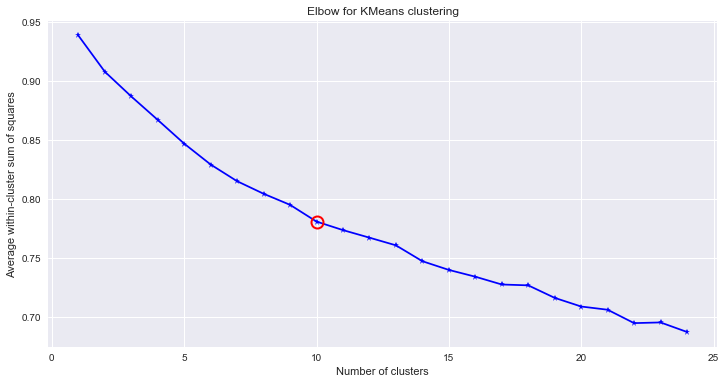

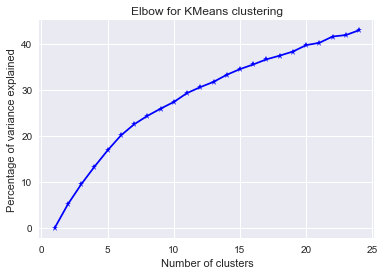

In [371]:
K = range(1,25)

KM = [KMeans(n_clusters=k).fit(tfidf_matrix) for k in K]


from scipy.spatial.distance import cdist, pdist

centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(tfidf_matrix.toarray(), cent,'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/tfidf_matrix.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(tfidf_matrix.toarray())**2)/tfidf_matrix.shape[0]
bss = tss-wcss

kIdx = 10-1

# elbow curve
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')


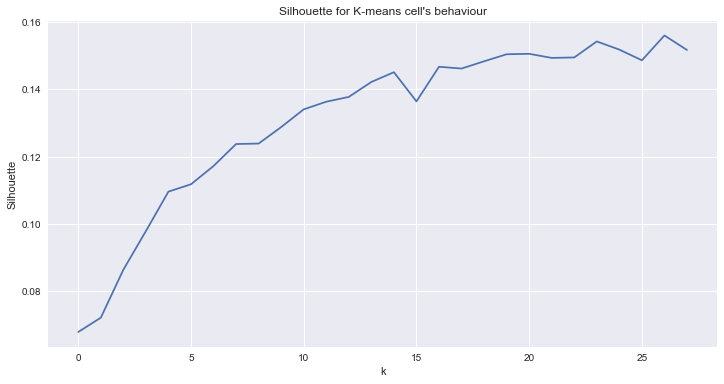

In [370]:
from sklearn.metrics import silhouette_score

s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(tfidf_matrix)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(tfidf_matrix, labels))

plt.figure(figsize=(12,6))
plt.plot(s)
plt.ylabel("Silhouette")
plt.xlabel("k")
plt.title("Silhouette for K-means cell's behaviour")
sns.despine()

In [901]:
groups.agg({'title':'count'}).sort_values('title',ascending=False)

,title
label,
11,383
7,221
1,185
5,176
0,145
10,143
8,142
3,121
4,119
